In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.integrate import Radau, solve_ivp

## Решение начального уравнения 
$$
\Delta_r \eta = -\eta^{\beta} , \eta(r\to0)\approx\eta_0 - \frac{\eta_0^{\beta}r^2}{6}
$$

In [3]:
def right_part(t, y, b=3/2):
    rp = np.copy(y)
    rp[0] = y[1]
    rp[1] = - y[1]/t - y[0]**b
    return rp

In [4]:
def jac(t, y, b=3/2):
    j = np.zeros((2,2))
    j[0,0]=0
    j[0,1] = 1
    j[1,0] = -b * y[0]**(b-1)
    j[1,1] = -2/t
    return j

In [5]:
t_0 = 1e-6
t_end = 100
eta_0 = 1
b=3/2
y_0 = np.array((eta_0, - eta_0**b / 3*t_0))

In [84]:
soll = solve_ivp(fun=right_part, t_span=(t_0, t_end), y0=y_0, method='Radau', args=(b,), jac=jac, max_step=1e-3)

<ipython-input-4-8c9f6b00d321>:4: RuntimeWarning: invalid value encountered in double_scalars
  rp[1] = - y[1]/t - y[0]**b


<IPython.core.display.Javascript object>


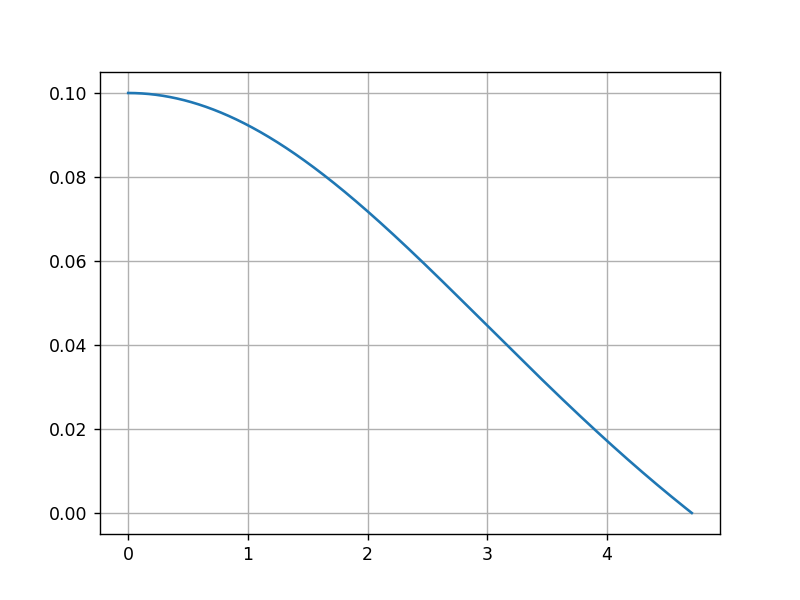

In [87]:
%matplotlib notebook
plt.plot(soll.t, soll.y[0])
plt.grid()

In [88]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

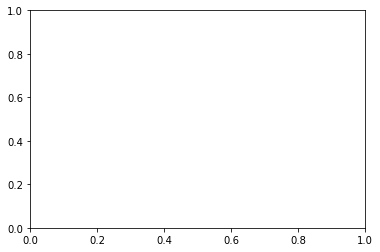

interactive(children=(FloatSlider(value=2.0, description='eta_0', max=4.0), FloatSlider(value=1.5, description…

In [124]:
%matplotlib inline
global ax
fig, ax = plt.subplots()
@interact_manual(eta_0=(0, 4, 0.1), b=(1.05,2,0.05))
def plot_point(eta_0, b):
    t_0 = 1e-6
    t_end = 100
    eta_0 = 0.1
    y_0 = np.array((eta_0, - eta_0**b / 3*t_0))
    soll = solve_ivp(fun=right_part, t_span=(t_0, t_end), y0=y_0, method='Radau', args=(b,), jac=jac, max_step=1e-3)
    t = soll.t
    eta = soll.y[0]
    rho = eta**b
    ax.plot(t, rho)#, label=fr'$\eta_0={eta_0}, \beta={b}$')
    plt.draw()

<IPython.core.display.Javascript object>


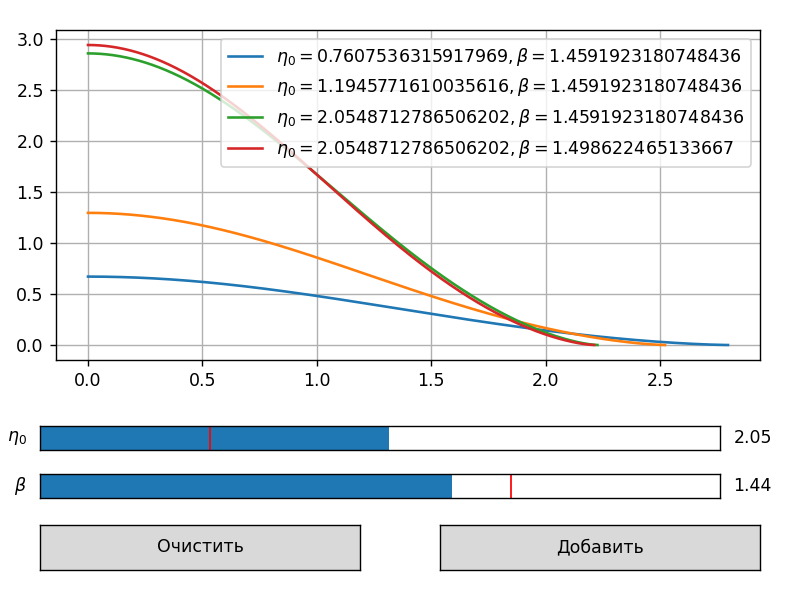

In [5]:
%matplotlib notebook
# Импортируем класс кнопки и слайдера
from matplotlib.widgets import Button, Slider



def addPlot(graph_axes, eta_0, b):
    '''Добавить график к осям'''
    t_0 = 1e-6
    t_end = 100
    y_0 = np.array((eta_0, - eta_0**b / 3*t_0))
    
    soll = solve_ivp(fun=right_part, t_span=(t_0, t_end), y0=y_0, method='Radau', args=(b,), jac=jac, max_step=1e-3)
    
    t = soll.t
    eta = soll.y[0]
    rho = eta**b
    
    graph_axes.plot(t, rho, label=fr'$\eta_0={eta_0}, \beta={b}$')
    graph_axes.legend()
    # Нужно для обновления графика
    plt.draw()


if __name__ == '__main__':
    def onButtonAddClicked(event):
        '''Обработчик события для кнопки "Добавить"'''
        # Будем использовать sigma и mu, установленные с помощью слайдеров
        global slider_eta_0
        global slider_b
        global graph_axes

        # Используем атрибут val, чтобы получить значение слайдеров
        addPlot(graph_axes, slider_eta_0.val, slider_b.val)

    def onButtonClearClicked(event):
        '''!!! Обработчик события нажатия кнопки "Очистить"'''
        global graph_axes

        graph_axes.clear()
        graph_axes.grid()
        plt.draw()

    # Создадим окно с графиком
    fig, graph_axes = plt.subplots()
    graph_axes.grid()

    # Оставим снизу от графика место для виджетов
    fig.subplots_adjust(left=0.07, right=0.95, top=0.95, bottom=0.4)

    # Создание кнопки "Добавить"
    axes_button_add = plt.axes([0.55, 0.05, 0.4, 0.075])
    button_add = Button(axes_button_add, 'Добавить')
    button_add.on_clicked(onButtonAddClicked)

    # !!! Создание кнопки "Очистить"
    axes_button_clear = plt.axes([0.05, 0.05, 0.4, 0.075])
    button_clear = Button(axes_button_clear, 'Очистить')
    button_clear.on_clicked(onButtonClearClicked)

    # Создание слайдера для задания sigma
    axes_slider_eta_0 = plt.axes([0.05, 0.25, 0.85, 0.04])
    slider_eta_0 = Slider(axes_slider_eta_0,
                          label=r'$\eta_0$',
                          valmin=0,
                          valmax=4,
                          valinit=1,
                          valfmt='%1.2f')

    # Создание слайдера для задания mu
    axes_slider_b = plt.axes([0.05, 0.17, 0.85, 0.04])
    slider_b = Slider(axes_slider_b,
                       label=r'$\beta$',
                       valmin=1.05,
                       valmax=1.7,
                       valinit=3/2,
                       valfmt='%1.2f')

    plt.show()

In [7]:
def get_r(eta_0, b=3/2):
    t_0 = 1e-6
    t_end = 100
    y_0 = np.array((eta_0, - eta_0**b / 3*t_0))
    
    soll = solve_ivp(fun=right_part, t_span=(t_0, t_end), y0=y_0, method='Radau', args=(b,), jac=jac, max_step=1e-3)
    
    t = soll.t
    return t[-1]
get_r = np.vectorize(get_r)

In [8]:
eta_test = np.linspace(0.1,3,30)
r_end = get_r(eta_test)

<ipython-input-3-8c9f6b00d321>:4: RuntimeWarning: invalid value encountered in double_scalars
  rp[1] = - y[1]/t - y[0]**b


<ipython-input-3-8c9f6b00d321>:4: RuntimeWarning: invalid value encountered in double_scalars
  rp[1] = - y[1]/t - y[0]**b


<IPython.core.display.Javascript object>


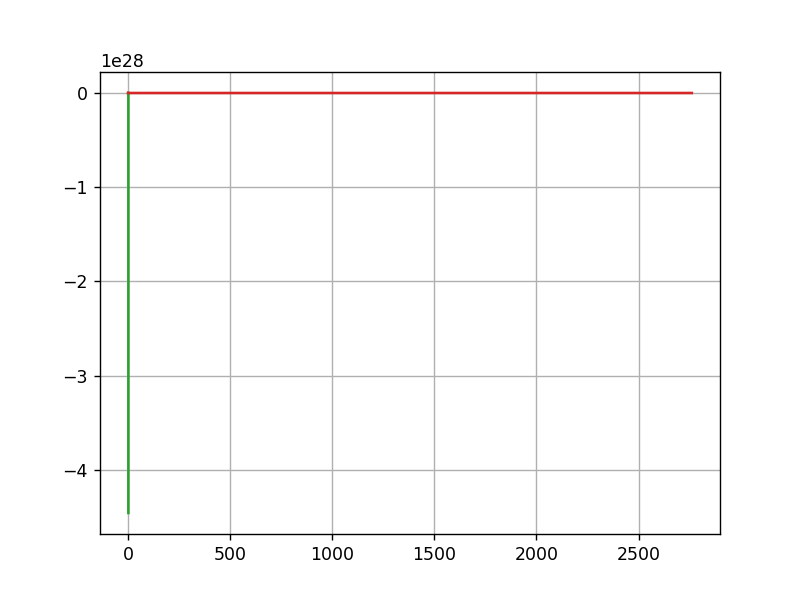

<ipython-input-3-8c9f6b00d321>:4: RuntimeWarning: invalid value encountered in double_scalars
  rp[1] = - y[1]/t - y[0]**b


In [17]:
%matplotlib notebook
t_0 = 1e-6
t_end = 100
b=3/2
eta_0 = 1
y_0 = np.array((eta_0, - eta_0**b / 3*t_0))

soll = solve_ivp(fun=right_part, t_span=(t_0, t_end), y0=y_0, method='Radau', args=(b,), jac=jac, max_step=1e-3)

t = soll.t
eta = soll.y[0]
rho = eta**b

r_end = t[-1]

r_renorm = t/r_end
eta_renorm = eta * r_end**(2/(b-1))
plt.plot(r_renorm, eta_renorm, label=r'$\gamma = \frac{5}{3}$')
#############
t_0 = 1e-6
t_end = 100
b=1/(1.6-1)
eta_0 = 1
y_0 = np.array((eta_0, - eta_0**b / 3*t_0))

soll = solve_ivp(fun=right_part, t_span=(t_0, t_end), y0=y_0, method='Radau', args=(b,), jac=jac, max_step=1e-3)

t = soll.t
eta = soll.y[0]
rho = eta**b

r_end = t[-1]

r_renorm = t/r_end
eta_renorm = eta * r_end**(2/(b-1))
plt.plot(r_renorm, eta_renorm, label=r'$\gamma = \1.2$')
#############
t_0 = 1e-6
t_end = 100
b=1/(1.5-1)
eta_0 = 1
y_0 = np.array((eta_0, - eta_0**b / 3*t_0))

soll = solve_ivp(fun=right_part, t_span=(t_0, t_end), y0=y_0, method='Radau', args=(b,), jac=jac, max_step=1e-3)

t = soll.t
eta = soll.y[0]
rho = eta**b

r_end = t[-1]

r_renorm = t/r_end
eta_renorm = eta * r_end**(2/(b-1))
plt.plot(r_renorm, eta_renorm, label=r'$\gamma = \1.2$')

plt.grid()
plt.legend()


<ipython-input-3-8c9f6b00d321>:4: RuntimeWarning: invalid value encountered in double_scalars
  rp[1] = - y[1]/t - y[0]**b


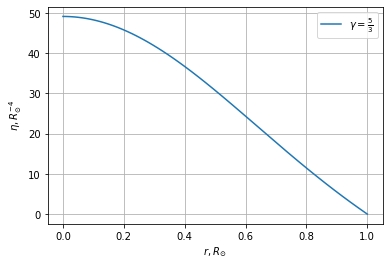

In [15]:
plt.figure()
t_0 = 1e-6
t_end = 100
g=5/3
b=1/(g-1)
eta_0 = 1
y_0 = np.array((eta_0-eta_0**b * t_0**2/6, - eta_0**b / 3 * t_0))

soll = solve_ivp(fun=right_part, t_span=(t_0, t_end), y0=y_0, method='Radau', args=(b,), jac=jac, max_step=1e-3)

t = soll.t
eta = soll.y[0]
rho = eta**b

r_end = t[-1]

r_renorm = t/r_end
eta_renorm = eta * r_end**(2/(b-1))
plt.plot(r_renorm, eta_renorm, label=r'$\gamma = \frac{5}{3}$')
plt.grid()
plt.xlabel(r'$r,R_{\odot}$')
plt.ylabel(r'$\eta, R_{\odot}^{-4}$')
plt.legend()
import tikzplotlib
tikzplotlib.clean_figure()
tikzplotlib.save("test.tex")

<ipython-input-3-8c9f6b00d321>:4: RuntimeWarning: invalid value encountered in double_scalars
  rp[1] = - y[1]/t - y[0]**b


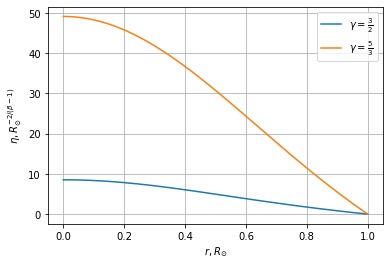

In [32]:
plt.figure()
t_0 = 1e-6
t_end = 100

g=6/4
b=1/(g-1)
eta_0 = 1
y_0 = np.array((eta_0-eta_0**b * t_0**2/6, - eta_0**b / 3 * t_0))

soll = solve_ivp(fun=right_part, t_span=(t_0, t_end), y0=y_0, method='Radau', args=(b,), jac=jac, max_step=1e-3)

t = soll.t
eta = soll.y[0]
t = t[eta>0]
eta = eta[eta>0]

r_end = t[-1]

r_renorm = t/r_end
eta_renorm = eta * r_end**(2/(b-1))
plt.plot(r_renorm, eta_renorm, label=r'$\gamma = \frac{3}{2}$')
rho_3_2 = eta_renorm**(1/(g-1))
r_3_2 = r_renorm
g=5/3
b=1/(g-1)
eta_0 = 1
y_0 = np.array((eta_0-eta_0**b * t_0**2/6, - eta_0**b / 3 * t_0))

soll = solve_ivp(fun=right_part, t_span=(t_0, t_end), y0=y_0, method='Radau', args=(b,), jac=jac, max_step=1e-3)

t = soll.t
eta = soll.y[0]
t = t[eta>0]
eta = eta[eta>0]

r_end = t[-1]

r_renorm = t/r_end
eta_renorm = eta * r_end**(2/(b-1))
plt.plot(r_renorm, eta_renorm, label=r'$\gamma = \frac{5}{3}$')
rho_5_3 = eta_renorm**(1/(g-1))
r_5_3 = r_renorm

plt.grid()
plt.xlabel(r'$r,R_{\odot}$')
plt.ylabel(r'$\eta, R_{\odot}^{-2/(\beta-1)}$')
plt.legend()
import tikzplotlib
tikzplotlib.clean_figure()
tikzplotlib.save("test.tex")

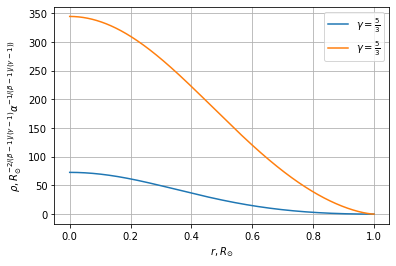

In [36]:
plt.plot(r_3_2, rho_3_2, label=r'$\gamma = \frac{5}{3}$')

plt.plot(r_5_3, rho_5_3, label=r'$\gamma = \frac{5}{3}$')
plt.grid()
plt.xlabel(r'$r,R_{\odot}$')
plt.ylabel(r'$\rho, R_{\odot}^{-2/(\beta-1)/(\gamma-1)}\alpha^{-1/(\beta-1)/(\gamma-1))}$')
plt.legend()

In [103]:
dr = r_3_2[1:]-r_3_2[:-1]
dmu= (r_3_2[:-1] + dr/2)**2*dr
f  = (rho_3_2[1:]+rho_3_2[:-1])/2
M  = np.sum(f*dmu)*4*np.pi
rho_3_2 = rho_3_2/M

dr = r_5_3[1:]-r_5_3[:-1]
dmu= (r_5_3[:-1] + dr/2)**2*dr
f  = (rho_5_3[1:]+rho_5_3[:-1])/2
M  = np.sum(f*dmu)*4*np.pi
rho_5_3 = rho_5_3/M

dr = r_5_3[1:]-r_5_3[:-1]
dmu= (r_5_3[:-1] + dr/2)**2*dr
f  = 1
M  = np.sum(f*dmu)*4*np.pi
rho_test = np.copy(r_5_3)
rho_test[:] = 1/M

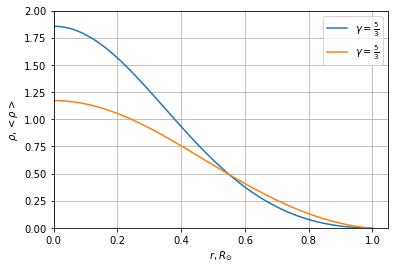

In [117]:
plt.plot(r_3_2, rho_3_2, label=r'$\gamma = \frac{5}{3}$')

plt.plot(r_5_3, rho_5_3, label=r'$\gamma = \frac{5}{3}$')
plt.grid()
plt.xlabel(r'$r,R_{\odot}$')
plt.ylabel(r'$\rho, <\rho>$')
plt.legend()
plt.xlim([0, 1.05])
plt.ylim([0, 2])
import tikzplotlib
tikzplotlib.clean_figure()
tikzplotlib.save("rho.tex")

In [85]:
def get_M(r, rho, point):
    b = (r <= point)
    r = r[b]
    rho = rho[b]
    dr = r[1:]-r[:-1]
    dmu= (r[:-1] + dr/2)**2*dr
    f  = (rho[1:]+rho[:-1])/2
    M  = np.sum(f*dmu)*4*np.pi
    return M

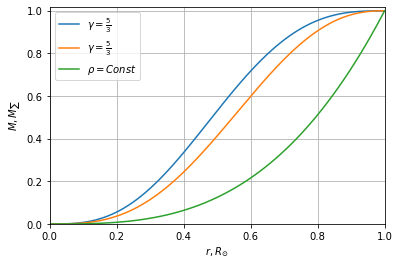

In [118]:
M_3_2 = []
for r in r_3_2:
    M_3_2.append(get_M(r_3_2, rho_3_2, r))
M_3_2 = np.array(M_3_2)    
plt.plot(r_3_2, M_3_2, label=r'$\gamma = \frac{5}{3}$')

M_5_3 = []
for r in r_5_3:
    M_5_3.append(get_M(r_5_3, rho_5_3, r))
M_5_3 = np.array(M_5_3)  
plt.plot(r_5_3, M_5_3, label=r'$\gamma = \frac{5}{3}$')

M_test = []
for r in r_5_3:
    M_test.append(get_M(r_5_3, rho_test, r))
M_test = np.array(M_test)  
plt.plot(r_5_3, M_test, label=r'$\rho=Const$')

plt.grid()
plt.xlabel(r'$r,R_{\odot}$')
plt.ylabel(r'$M, M_{\sum}$')
plt.legend()
plt.xlim([0, 1.0])
plt.ylim([0, 1.02])
#import tikzplotlib
tikzplotlib.clean_figure()
tikzplotlib.save("mass.tex")

In [96]:
def get_U(r, rho, M):
    dr = r[1:]-r[:-1]
    dmu= 4*np.pi*(r[:-1] + dr/2)*dr
    f  = (rho[1:]+rho[:-1])/2 *  M[:-1]
    U  = np.sum(f*dmu)
    return U

In [115]:
U_test = get_U(r_5_3, rho_test, M_test)
U_5_3 = get_U(r_5_3, rho_5_3, M_5_3)
U_3_2 = get_U(r_3_2, rho_3_2, M_3_2)

In [116]:
print(U_test,U_5_3, U_3_2)

0.5995752104666284 0.821620738919691 0.9164130732533188
